# 01_segmentation_train.ipynb

This file performs the model training process of our Pix2Pix-based lung segmentation system.



### Part 1: Define directories, import required libraries and setup sesion

In [1]:
# Change working directory to the root folder
import os, sys
if os.path.split(os.getcwd())[-1] != 'SmartDetect_segmentation':
    %cd ..
    sys.path.append("src")
    
    if os.path.split(os.getcwd())[-1] != 'SmartDetect_segmentation':
        raise UserError("Something went wrong in the directory reassignment!")

D:\Users\sjors\Documents\TUe\MSc\Q3\8FM30\Project\SmartDetect_segmentation


In [2]:
# Perform required imports
import numpy as np
import matplotlib.pyplot as plt
from preprocessing import preprocessing
from dataset import generate_dataset
from model import define_discriminator, define_generator, define_gan
from training import *
from util.general import *
from util.inspection import *
from util.tf_session import *

# Setup GPU tensorflow session
n_gpus = setup_tf_gpu_session()

Using TensorFlow backend.


In [3]:
# Define some basic directories to use in the rest of this program
dataDir = os.path.join("data", "preprocessed")
modelDir = "model"
notebookDir = "notebook"
logDir = "logs"

### Part 2: Perform data preprocessing
Please note that since this part may take quite a long time, it is skipped on default if the software detects preprocessed data already.

In [4]:
# Preprocessing the data. 
# To rerun the preprocessing, change 'rerun' to True

preprocessing(rerun=False)

--- Performing data preprocessing --- 
Extracting data from:	D:\Users\sjors\Documents\TUe\MSc\Q3\8FM30\Project\SmartDetect_segmentation\data\raw
Outputting data to:	D:\Users\sjors\Documents\TUe\MSc\Q3\8FM30\Project\SmartDetect_segmentation\data\preprocessed

Extracting data from subset 'CXR_ChinaSet' (1/3)... 
(found 566 images)
 |##################################################| 100.0% 

Result: WARNING (Missed 96 mask files)

Extracting data from subset 'CXR_Manual  ' (2/3)... 
(found 188 images)
 |##################################################| 100.0% 

Result: OK

Extracting data from subset 'CXR_Mntg    ' (3/3)... 
(found 138 images)
 |##################################################| 100.0% 

Result: OK


### Part 3: Dataset generation
The data is split into a training and test set per default.
Validation is performed with the training set based on a later split.

In [5]:
dataset_train = generate_dataset(dataDir, split_dataset=True, train_or_test='train')
dataset_test = generate_dataset(dataDir, split_dataset=True, train_or_test='test')


--- Performing data extraction (train) ---

Extracting data from D:\Users\sjors\Documents\TUe\MSc\Q3\8FM30\Project\SmartDetect_segmentation\data\preprocessed
 |##################################################| 100.0% 
Completed. Dataset consists of 714 images and is 0.75 GB

--- Performing data extraction (test) ---

Extracting data from D:\Users\sjors\Documents\TUe\MSc\Q3\8FM30\Project\SmartDetect_segmentation\data\preprocessed
 |##################################################| 100.0% 
Completed. Dataset consists of 178 images and is 0.19 GB


##### Visual data inspection
Here, we will also briefly inspect the data we'll be training the model with.

--- Performing data inspection for dataset 'train' ---

Amount of subjects:	714
Image size:		256, 256


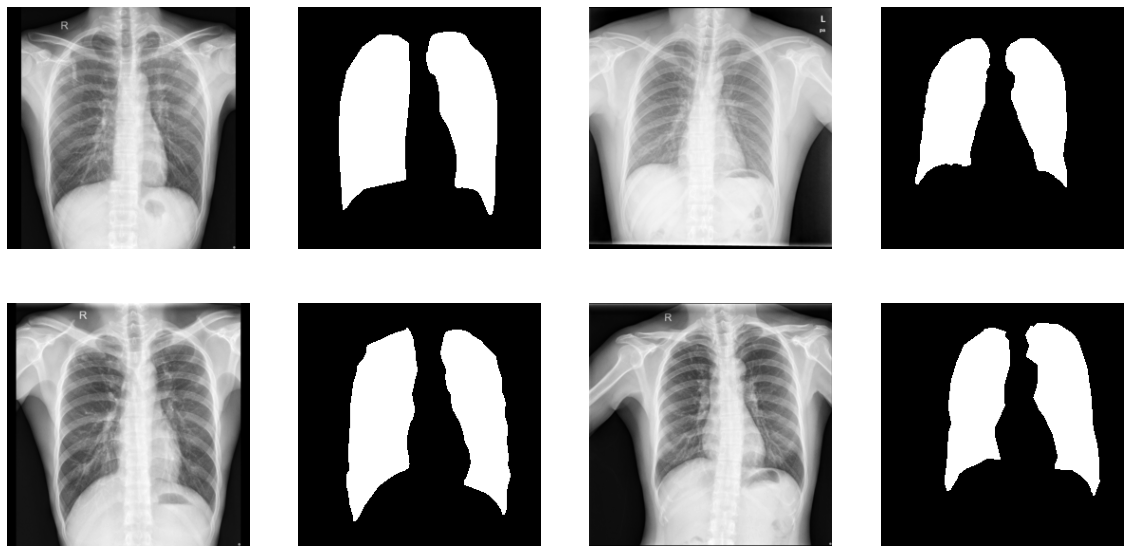



--- Performing data inspection for dataset 'test' ---

Amount of subjects:	178
Image size:		256, 256


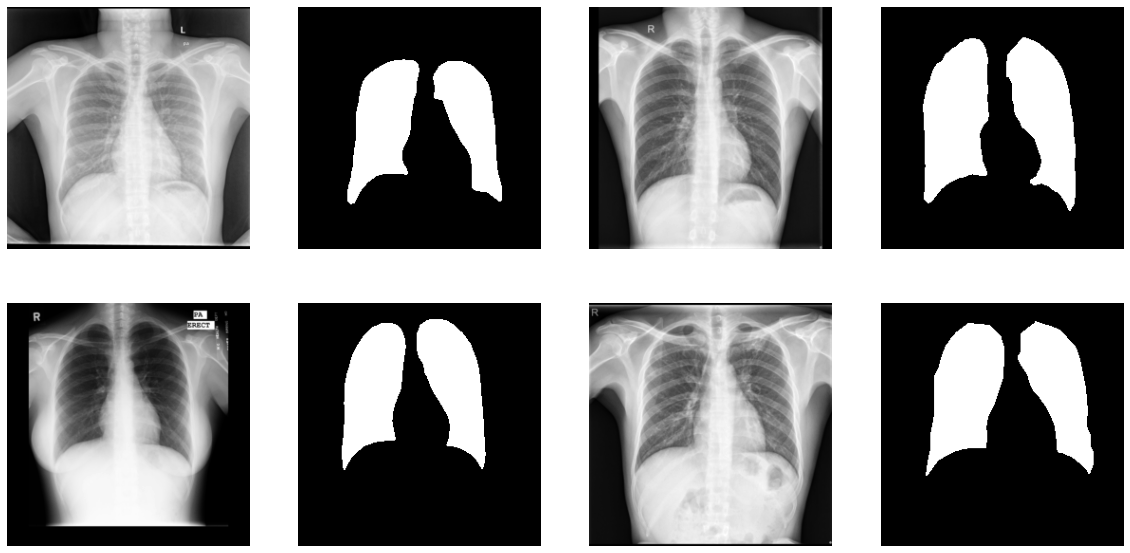

In [6]:
_, image_shape = inspect_dataset(dataset_train, 'train')
_, _ = inspect_dataset(dataset_test, 'test')

### Part 4: Model definition
Here, we will define the GAN model we'll be using for the segmentation purposes.
It is derived from the Pix2Pix model.

In [7]:
image_shape = (image_shape[0], image_shape[1], 1)

g_model = define_generator(image_shape)
d_model = define_discriminator(image_shape)
gan_model = define_gan(g_model, d_model, image_shape)

### Part 5: Monitoring
The training process is monitored via TensorBoard.
The results will be displayed here by default. Note, however, that we may also monitor the process manually or after training time by opening tensorboard via the terminal as such:

`tensorboard --logdir "logs"`

In [8]:
%load_ext tensorboard
%tensorboard --logdir {logDir}

Reusing TensorBoard on port 6006 (pid 12568), started 0:47:13 ago. (Use '!kill 12568' to kill it.)

### Part 6: Training
Here, the actual training process is performed. 
We may pass some hyperparameters in the 'train' function.

In [9]:
train(d_model, g_model, gan_model, dataset_train) 


Epoch 1/100:


100%|################################################################################| 142/142 [01:13<00:00,  1.93it/s]


>Losses: d1[0.246] d2[0.314] g[6.522]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0000143.h5s

Epoch 2/100:


100%|################################################################################| 142/142 [00:53<00:00,  2.65it/s]


>Losses: d1[0.261] d2[0.472] g[5.912]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0000285.h5s

Epoch 3/100:


100%|################################################################################| 142/142 [00:53<00:00,  2.65it/s]


>Losses: d1[0.050] d2[0.108] g[8.824]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0000427.h5s

Epoch 4/100:


100%|################################################################################| 142/142 [00:52<00:00,  2.72it/s]


>Losses: d1[0.041] d2[0.079] g[9.383]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0000569.h5s

Epoch 5/100:


100%|################################################################################| 142/142 [00:51<00:00,  2.76it/s]


>Losses: d1[0.247] d2[0.397] g[4.459]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0000711.h5s

Epoch 6/100:


100%|################################################################################| 142/142 [00:52<00:00,  2.72it/s]


>Losses: d1[0.392] d2[0.594] g[4.122]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0000853.h5s

Epoch 7/100:


100%|################################################################################| 142/142 [00:52<00:00,  2.68it/s]


>Losses: d1[0.496] d2[0.379] g[5.942]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0000995.h5s


  0%|                                                                                          | 0/142 [00:00<?, ?it/s]


Epoch 8/100:


100%|################################################################################| 142/142 [00:53<00:00,  2.63it/s]


>Losses: d1[0.247] d2[0.321] g[3.891]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0001137.h5s

Epoch 9/100:


100%|################################################################################| 142/142 [00:54<00:00,  2.59it/s]


>Losses: d1[0.164] d2[0.155] g[5.978]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0001279.h5s

Epoch 10/100:


100%|################################################################################| 142/142 [00:52<00:00,  2.69it/s]


>Losses: d1[0.037] d2[0.036] g[8.402]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0001421.h5s

Epoch 11/100:


100%|################################################################################| 142/142 [00:53<00:00,  2.65it/s]


>Losses: d1[0.339] d2[0.279] g[5.114]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0001563.h5s

Epoch 12/100:


100%|################################################################################| 142/142 [00:52<00:00,  2.69it/s]


>Losses: d1[0.035] d2[0.040] g[8.016]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0001705.h5s

Epoch 13/100:


100%|################################################################################| 142/142 [00:52<00:00,  2.68it/s]


>Losses: d1[0.015] d2[0.063] g[7.025]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0001847.h5s

Epoch 14/100:


100%|################################################################################| 142/142 [00:52<00:00,  2.68it/s]


>Losses: d1[0.263] d2[0.408] g[6.933]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0001989.h5s

Epoch 15/100:


100%|################################################################################| 142/142 [00:53<00:00,  2.68it/s]


>Losses: d1[0.066] d2[0.063] g[5.484]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0002131.h5s

Epoch 16/100:


100%|################################################################################| 142/142 [00:54<00:00,  2.60it/s]


>Losses: d1[0.041] d2[0.075] g[5.468]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0002273.h5s

Epoch 17/100:


100%|################################################################################| 142/142 [00:54<00:00,  2.59it/s]


>Losses: d1[0.092] d2[0.370] g[5.243]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0002415.h5s

Epoch 18/100:


100%|################################################################################| 142/142 [00:52<00:00,  2.71it/s]


>Losses: d1[0.274] d2[0.342] g[4.199]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0002557.h5s

Epoch 19/100:


100%|################################################################################| 142/142 [00:52<00:00,  2.72it/s]


>Losses: d1[0.276] d2[0.339] g[3.969]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0002699.h5s

Epoch 20/100:


100%|################################################################################| 142/142 [00:52<00:00,  2.69it/s]


>Losses: d1[0.010] d2[0.032] g[5.631]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0002841.h5s

Epoch 21/100:


100%|################################################################################| 142/142 [00:53<00:00,  2.67it/s]


>Losses: d1[0.016] d2[0.022] g[5.877]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0002983.h5s

Epoch 22/100:


100%|################################################################################| 142/142 [00:53<00:00,  2.65it/s]


>Losses: d1[0.502] d2[0.287] g[2.644]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0003125.h5s

Epoch 23/100:


100%|################################################################################| 142/142 [00:51<00:00,  2.73it/s]


>Losses: d1[0.283] d2[0.357] g[5.276]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0003267.h5s

Epoch 24/100:


100%|################################################################################| 142/142 [00:51<00:00,  2.74it/s]


>Losses: d1[0.337] d2[0.334] g[3.294]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0003409.h5s

Epoch 25/100:


100%|################################################################################| 142/142 [00:51<00:00,  2.74it/s]


>Losses: d1[0.102] d2[0.198] g[4.085]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0003551.h5s

Epoch 26/100:


100%|################################################################################| 142/142 [00:51<00:00,  2.75it/s]


>Losses: d1[0.072] d2[0.112] g[4.627]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0003693.h5s

Epoch 27/100:


100%|################################################################################| 142/142 [00:51<00:00,  2.76it/s]


>Losses: d1[0.293] d2[0.375] g[2.913]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0003835.h5s

Epoch 28/100:


100%|################################################################################| 142/142 [00:52<00:00,  2.71it/s]


>Losses: d1[0.078] d2[0.217] g[4.962]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0003977.h5s

Epoch 29/100:


100%|################################################################################| 142/142 [00:51<00:00,  2.76it/s]


>Losses: d1[0.015] d2[0.030] g[5.377]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0004119.h5s

Epoch 30/100:


100%|################################################################################| 142/142 [00:51<00:00,  2.77it/s]


>Losses: d1[0.349] d2[0.418] g[3.843]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0004261.h5s

Epoch 31/100:


100%|################################################################################| 142/142 [00:51<00:00,  2.73it/s]


>Losses: d1[0.034] d2[0.060] g[4.569]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0004403.h5s

Epoch 32/100:


100%|################################################################################| 142/142 [00:51<00:00,  2.75it/s]


>Losses: d1[0.027] d2[0.040] g[5.080]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0004545.h5s

Epoch 33/100:


100%|################################################################################| 142/142 [00:51<00:00,  2.75it/s]


>Losses: d1[0.018] d2[0.033] g[5.378]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0004687.h5s

Epoch 34/100:


100%|################################################################################| 142/142 [00:52<00:00,  2.72it/s]


>Losses: d1[0.342] d2[0.406] g[2.770]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0004829.h5s

Epoch 35/100:


100%|################################################################################| 142/142 [00:52<00:00,  2.72it/s]


>Losses: d1[0.038] d2[0.037] g[4.990]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0004971.h5s

Epoch 36/100:


100%|################################################################################| 142/142 [00:52<00:00,  2.71it/s]


>Losses: d1[0.013] d2[0.040] g[8.080]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0005113.h5s

Epoch 37/100:


100%|################################################################################| 142/142 [00:51<00:00,  2.73it/s]


>Losses: d1[0.361] d2[0.377] g[2.997]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0005255.h5s

Epoch 38/100:


100%|################################################################################| 142/142 [00:52<00:00,  2.71it/s]


>Losses: d1[0.172] d2[0.211] g[4.134]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0005397.h5s

Epoch 39/100:


100%|################################################################################| 142/142 [00:51<00:00,  2.75it/s]


>Losses: d1[0.015] d2[0.030] g[5.268]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0005539.h5s

Epoch 40/100:


100%|################################################################################| 142/142 [00:51<00:00,  2.74it/s]


>Losses: d1[0.233] d2[0.325] g[3.305]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0005681.h5s

Epoch 41/100:


100%|################################################################################| 142/142 [00:54<00:00,  2.63it/s]


>Losses: d1[0.270] d2[0.201] g[3.974]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0005823.h5s

Epoch 42/100:


100%|################################################################################| 142/142 [00:53<00:00,  2.66it/s]


>Losses: d1[0.023] d2[0.056] g[4.230]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0005965.h5s

Epoch 43/100:


100%|################################################################################| 142/142 [00:52<00:00,  2.70it/s]


>Losses: d1[0.010] d2[0.027] g[5.655]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0006107.h5s

Epoch 44/100:


100%|################################################################################| 142/142 [00:51<00:00,  2.75it/s]


>Losses: d1[0.077] d2[0.165] g[4.020]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0006249.h5s

Epoch 45/100:


100%|################################################################################| 142/142 [00:51<00:00,  2.77it/s]


>Losses: d1[0.008] d2[0.027] g[5.476]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0006391.h5s

Epoch 46/100:


100%|################################################################################| 142/142 [00:52<00:00,  2.72it/s]


>Losses: d1[0.124] d2[0.373] g[3.560]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0006533.h5s

Epoch 47/100:


100%|################################################################################| 142/142 [00:53<00:00,  2.65it/s]


>Losses: d1[0.187] d2[0.241] g[3.558]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0006675.h5s

Epoch 48/100:


100%|################################################################################| 142/142 [00:53<00:00,  2.66it/s]


>Losses: d1[0.014] d2[0.032] g[5.115]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0006817.h5s

Epoch 49/100:


100%|################################################################################| 142/142 [00:53<00:00,  2.65it/s]


>Losses: d1[0.010] d2[0.015] g[5.457]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0006959.h5s

Epoch 50/100:


100%|################################################################################| 142/142 [00:53<00:00,  2.67it/s]


>Losses: d1[0.438] d2[0.352] g[2.145]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0007101.h5s

Epoch 51/100:


100%|################################################################################| 142/142 [00:52<00:00,  2.72it/s]


>Losses: d1[0.035] d2[0.050] g[4.180]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0007243.h5s

Epoch 52/100:


100%|################################################################################| 142/142 [00:52<00:00,  2.73it/s]


>Losses: d1[0.441] d2[0.337] g[3.174]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0007385.h5s

Epoch 53/100:


100%|################################################################################| 142/142 [00:52<00:00,  2.71it/s]


>Losses: d1[0.013] d2[0.022] g[5.040]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0007527.h5s

Epoch 54/100:


100%|################################################################################| 142/142 [00:51<00:00,  2.73it/s]


>Losses: d1[0.005] d2[0.016] g[7.369]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0007669.h5s

Epoch 55/100:


100%|################################################################################| 142/142 [00:52<00:00,  2.73it/s]


>Losses: d1[0.517] d2[0.448] g[3.939]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0007811.h5s

Epoch 56/100:


100%|################################################################################| 142/142 [00:52<00:00,  2.72it/s]


>Losses: d1[0.452] d2[0.372] g[3.741]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0007953.h5s

Epoch 57/100:


100%|################################################################################| 142/142 [00:52<00:00,  2.70it/s]


>Losses: d1[0.006] d2[0.021] g[5.533]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0008095.h5s

Epoch 58/100:


100%|################################################################################| 142/142 [00:52<00:00,  2.72it/s]


>Losses: d1[0.008] d2[0.018] g[6.172]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0008237.h5s

Epoch 59/100:


100%|################################################################################| 142/142 [00:51<00:00,  2.73it/s]


>Losses: d1[0.357] d2[0.308] g[3.870]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0008379.h5s

Epoch 60/100:


100%|################################################################################| 142/142 [00:53<00:00,  2.66it/s]


>Losses: d1[0.012] d2[0.020] g[5.367]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0008521.h5s

Epoch 61/100:


100%|################################################################################| 142/142 [00:51<00:00,  2.75it/s]


>Losses: d1[0.422] d2[0.365] g[2.262]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0008663.h5s

Epoch 62/100:


100%|################################################################################| 142/142 [00:54<00:00,  2.61it/s]


>Losses: d1[0.421] d2[0.366] g[2.729]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0008805.h5s

Epoch 63/100:


100%|################################################################################| 142/142 [00:53<00:00,  2.67it/s]


>Losses: d1[0.016] d2[0.042] g[4.477]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0008947.h5s


  0%|                                                                                          | 0/142 [00:00<?, ?it/s]


Epoch 64/100:


100%|################################################################################| 142/142 [00:52<00:00,  2.73it/s]


>Losses: d1[0.378] d2[0.432] g[2.650]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0009089.h5s

Epoch 65/100:


100%|################################################################################| 142/142 [00:51<00:00,  2.75it/s]


>Losses: d1[0.009] d2[0.042] g[5.580]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0009231.h5s

Epoch 66/100:


100%|################################################################################| 142/142 [00:50<00:00,  2.79it/s]


>Losses: d1[0.006] d2[0.024] g[5.075]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0009373.h5s

Epoch 67/100:


100%|################################################################################| 142/142 [00:52<00:00,  2.72it/s]


>Losses: d1[0.008] d2[0.040] g[5.076]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0009515.h5s

Epoch 68/100:


100%|################################################################################| 142/142 [00:54<00:00,  2.61it/s]


>Losses: d1[0.624] d2[0.432] g[3.352]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0009657.h5s

Epoch 69/100:


100%|################################################################################| 142/142 [00:53<00:00,  2.64it/s]


>Losses: d1[0.006] d2[0.019] g[7.877]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0009799.h5s

Epoch 70/100:


100%|################################################################################| 142/142 [00:52<00:00,  2.72it/s]


>Losses: d1[0.005] d2[0.014] g[7.076]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0009941.h5s

Epoch 71/100:


100%|################################################################################| 142/142 [00:54<00:00,  2.61it/s]


>Losses: d1[0.007] d2[0.027] g[5.593]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0010083.h5s

Epoch 72/100:


100%|################################################################################| 142/142 [00:53<00:00,  2.66it/s]


>Losses: d1[0.004] d2[0.017] g[7.409]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0010225.h5s

Epoch 73/100:


100%|################################################################################| 142/142 [00:53<00:00,  2.67it/s]


>Losses: d1[0.011] d2[0.032] g[4.924]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0010367.h5s

Epoch 74/100:


100%|################################################################################| 142/142 [01:07<00:00,  2.11it/s]


>Losses: d1[0.006] d2[0.017] g[5.803]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0010509.h5s

Epoch 75/100:


100%|################################################################################| 142/142 [00:53<00:00,  2.65it/s]


>Losses: d1[0.006] d2[0.016] g[7.376]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0010651.h5s

Epoch 76/100:


100%|################################################################################| 142/142 [00:53<00:00,  2.64it/s]


>Losses: d1[0.265] d2[0.345] g[3.519]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0010793.h5s

Epoch 77/100:


100%|################################################################################| 142/142 [00:53<00:00,  2.66it/s]


>Losses: d1[0.007] d2[0.027] g[5.292]
>Saved model: model\run_2021-03-29_20-53-46\g_model_0010935.h5s

Epoch 78/100:


 82%|#################################################################3              | 116/142 [00:53<00:11,  2.18it/s]


InternalError: GPU sync failed